In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")

In [4]:
data_train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [5]:
data_train.dtypes

Location                  object
Cross_Street              object
Latitude                 float64
Longitude                float64
Date_Reported             object
Date_Occurred             object
Time_Occurred            float64
Area_ID                  float64
Area_Name                 object
Reporting_District_no    float64
Part 1-2                 float64
Modus_Operandi            object
Victim_Age               float64
Victim_Sex                object
Victim_Descent            object
Premise_Code             float64
Premise_Description       object
Weapon_Used_Code         float64
Weapon_Description        object
Status                    object
Status_Description        object
Crime_Category            object
dtype: object

In [6]:
data_train.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [7]:
data_train['Cross_Street'].fillna('Unknown', inplace=True)
data_train['Modus_Operandi'].fillna('Unknown', inplace=True)
data_train['Victim_Sex'].fillna('Unknown', inplace=True)
data_train['Weapon_Used_Code'].fillna('Unknown', inplace=True)
data_train['Weapon_Description'].fillna('Unknown', inplace=True)
data_train['Victim_Descent'].fillna('Unknown', inplace=True)
data_train['Premise_Description'].fillna('Unknown', inplace=True)

/tmp/ipykernel_18/3529604405.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Cross_Street'].fillna('Unknown', inplace=True)
/tmp/ipykernel_18/3529604405.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [8]:
data_train.isnull().sum()

Location                 0
Cross_Street             0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
Crime_Category           0
dtype: int64

In [9]:
data_train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           20000 non-null  object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         20000 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             20000 non-null  object 
 14  Victim_Descent         20000 non-null  object 
 15  Pr

Applying t-SNE
Visualizing t-SNE results


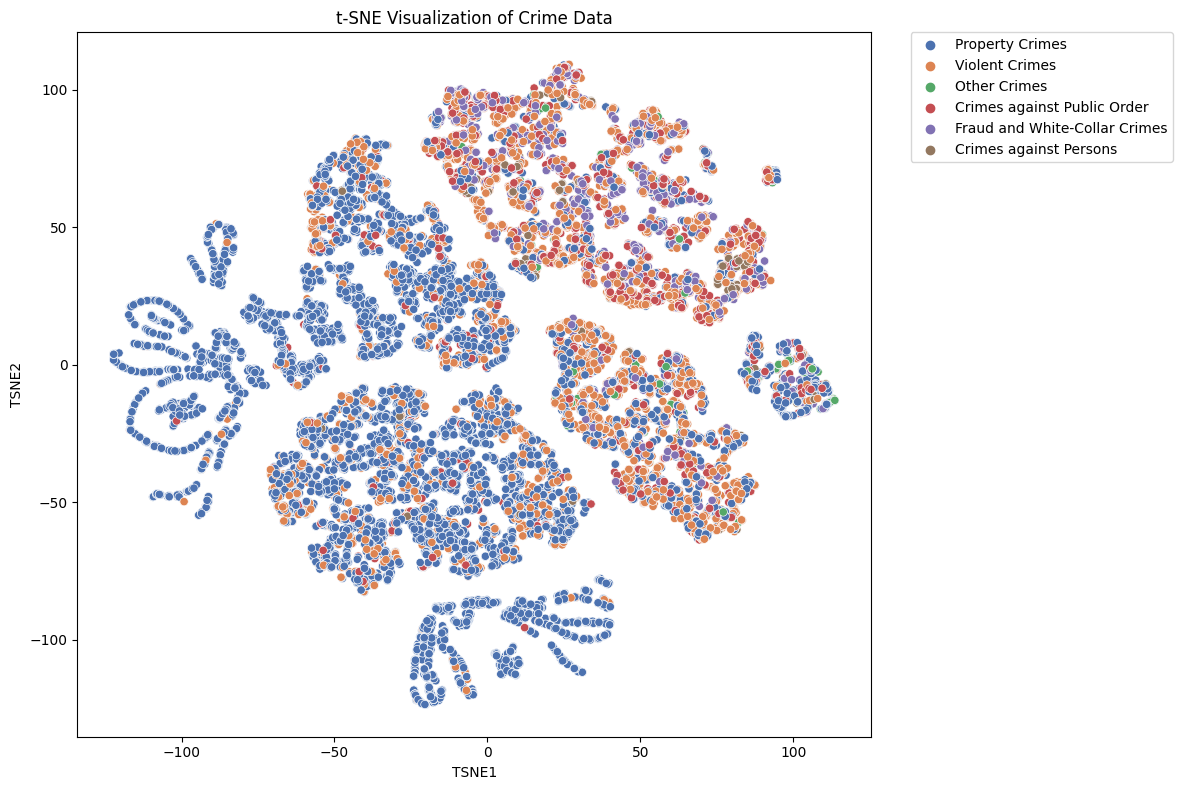

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

numerical_features = data_train.select_dtypes(include=['int64', 'float64']).columns


scaler = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  
)

X_scaled = scaler.fit_transform(data_train[numerical_features])

print("Applying t-SNE")
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Crime_Category'] = data_train['Crime_Category'].values  # Ensure alignment with original DataFrame

print("Visualizing t-SNE results")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Crime_Category', palette='deep', legend='full')
plt.title('t-SNE Visualization of Crime Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


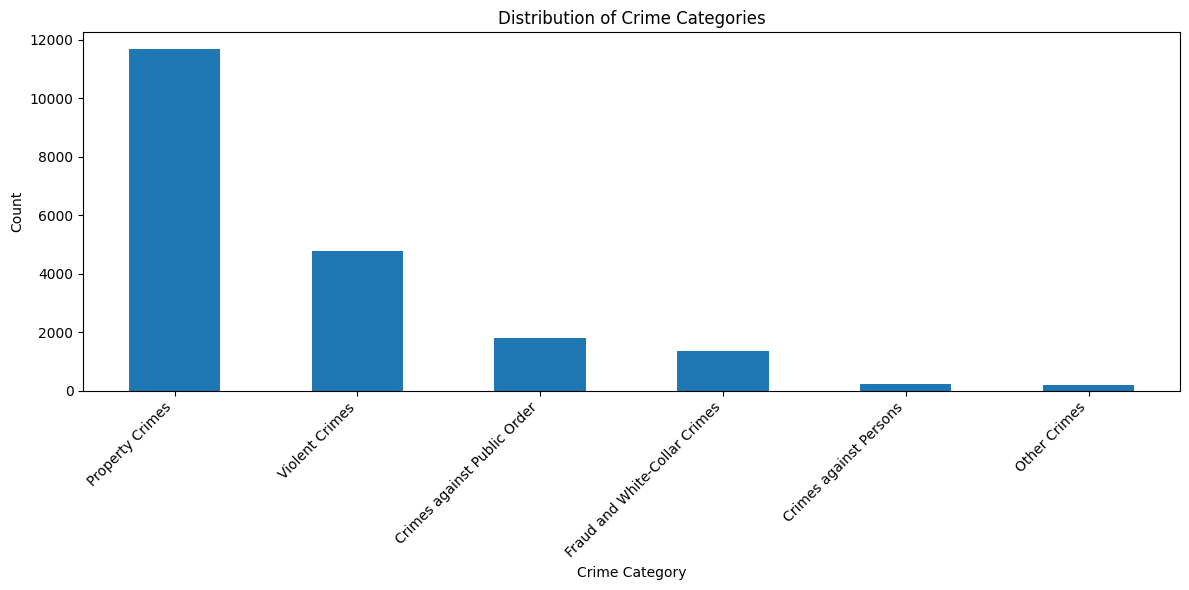

In [12]:
plt.figure(figsize=(12, 6))
data_train['Crime_Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Crime Categories')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

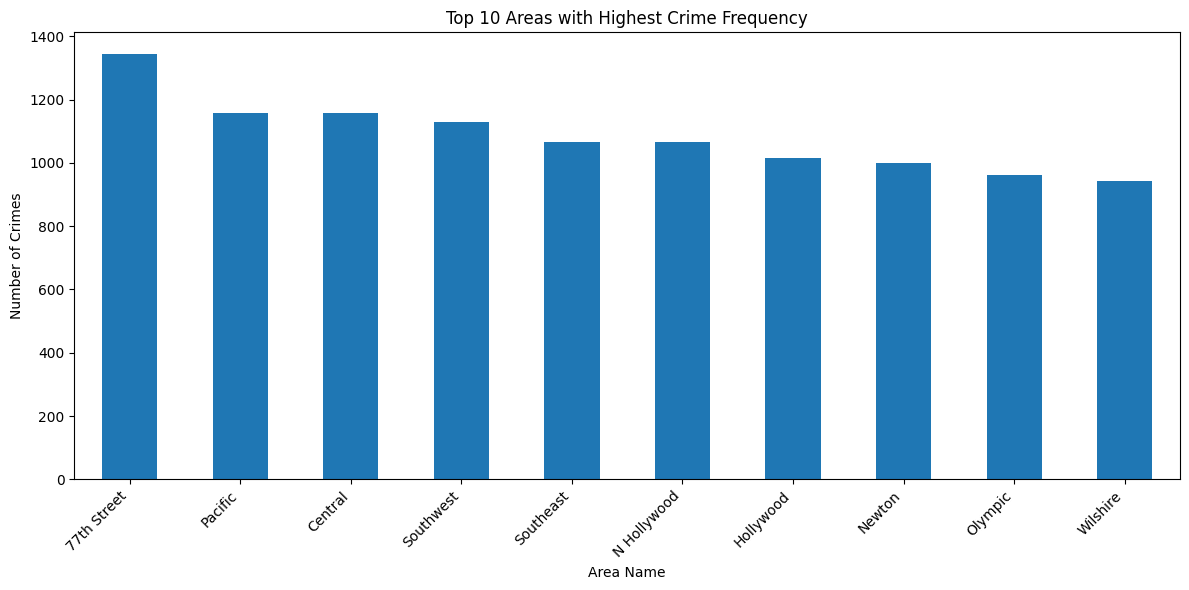

Crime Frequency by Area:
Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Name: count, dtype: int64


In [13]:
plt.figure(figsize=(12, 6))
area_counts = data_train['Area_Name'].value_counts().head(10)
area_counts.plot(kind='bar')
plt.title('Top 10 Areas with Highest Crime Frequency')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Crime Frequency by Area:")
print(area_counts)

/tmp/ipykernel_18/3633358593.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_train['Date_Occurred'] = pd.to_datetime(data_train['Date_Occurred'])


<Figure size 1500x1000 with 0 Axes>

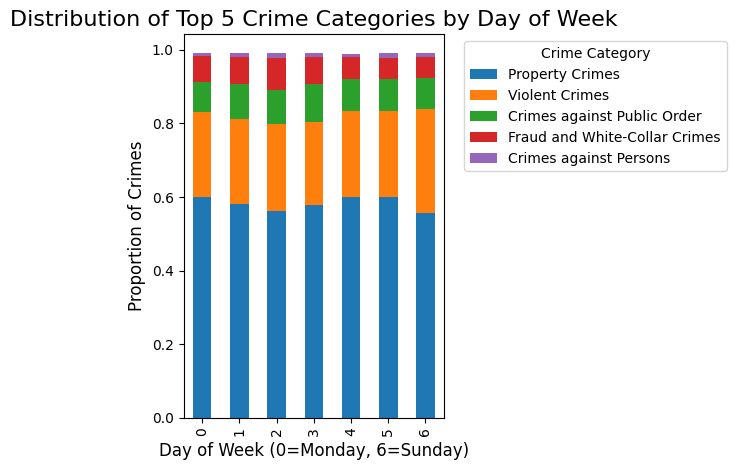

In [14]:
data_train['Date_Occurred'] = pd.to_datetime(data_train['Date_Occurred'])

data_train['DayOfWeek'] = data_train['Date_Occurred'].dt.dayofweek

day_crime = pd.crosstab(data_train['DayOfWeek'], data_train['Crime_Category'])

day_crime_prop = day_crime.div(day_crime.sum(axis=1), axis=0)

top_5_crimes = day_crime.sum().nlargest(5).index

plt.figure(figsize=(15, 10))
day_crime_prop[top_5_crimes].plot(kind='bar', stacked=True)

plt.title('Distribution of Top 5 Crime Categories by Day of Week', fontsize=16)
plt.xlabel('Day of Week (0=Monday, 6=Sunday)', fontsize=12)
plt.ylabel('Proportion of Crimes', fontsize=12)
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


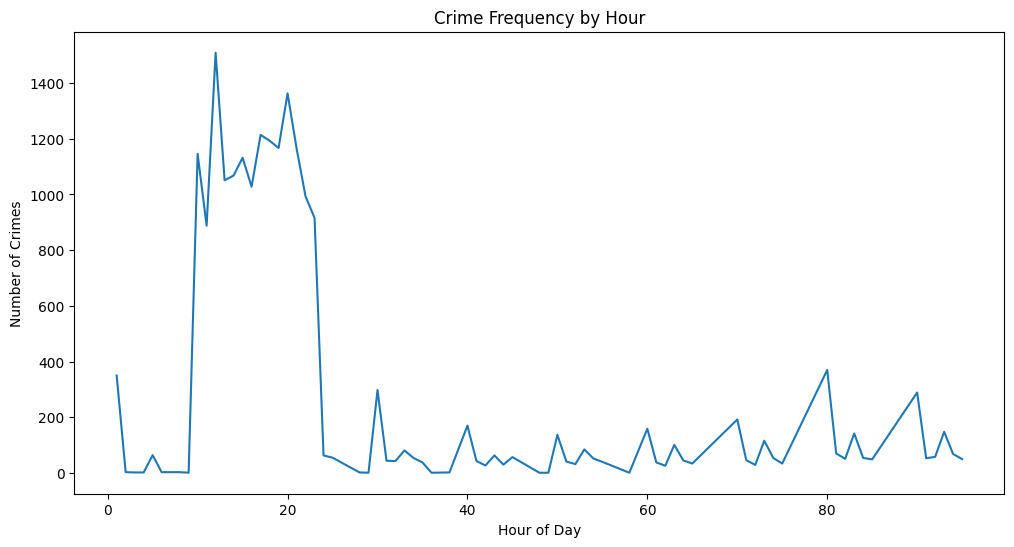

In [15]:
data_train['Year'] = data_train['Date_Occurred'].dt.year
data_train['Month'] = data_train['Date_Occurred'].dt.month
data_train['Day'] = data_train['Date_Occurred'].dt.day
data_train['DayOfWeek'] = data_train['Date_Occurred'].dt.dayofweek
data_train['Hour'] = data_train['Time_Occurred'].apply(lambda x: int(str(x).zfill(4)[:2]))
data_train['Date_Occurred'] = pd.to_datetime(data_train['Date_Occurred'])
data_train['Hour'] = data_train['Time_Occurred'].apply(lambda x: int(str(x).zfill(4)[:2]))
data_train['Hour'] = data_train['Time_Occurred'].apply(lambda x: int(str(x).zfill(4)[:2]))
plt.figure(figsize=(12, 6))
data_train['Hour'].value_counts().sort_index().plot(kind='line')
plt.title('Crime Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()


['M' 'X' 'F' 'Unknown' 'H']


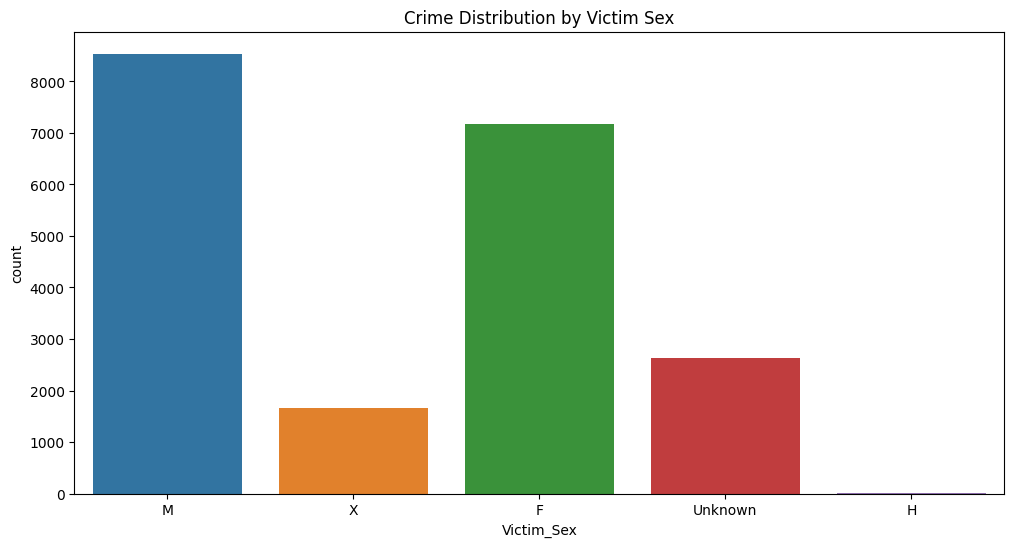

In [16]:
print(data_train["Victim_Sex"].unique())
plt.figure(figsize=(12, 6))
sns.countplot(data=data_train, x='Victim_Sex')
plt.title('Crime Distribution by Victim Sex')
plt.show()

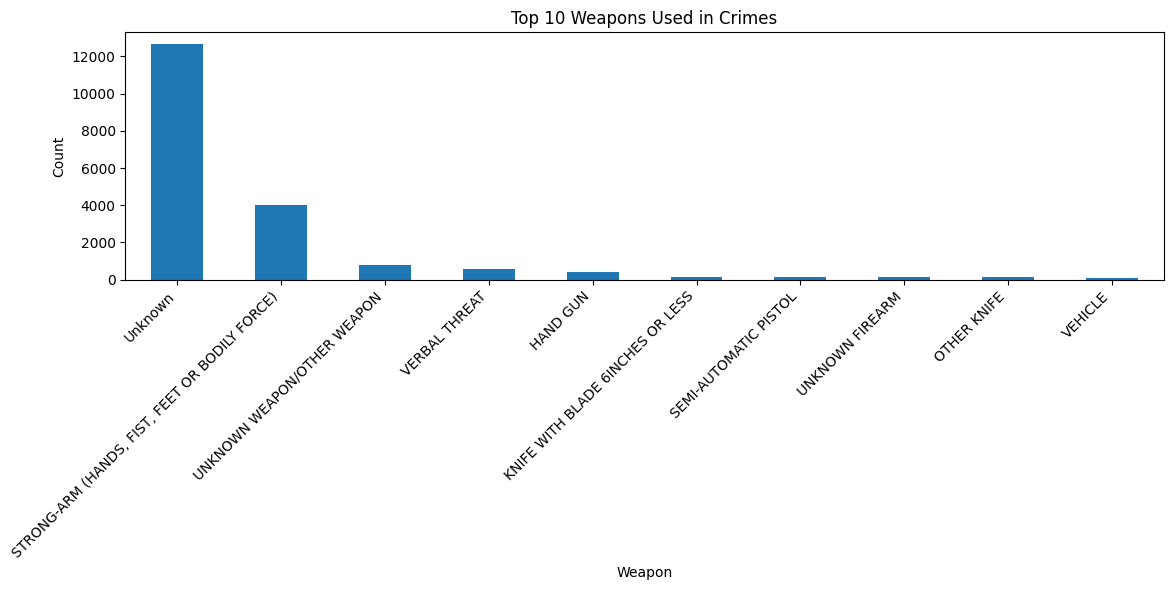

In [17]:
plt.figure(figsize=(12, 6))
data_train['Weapon_Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Weapons Used in Crimes')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 Crime Premises:
Premise_Description
STREET                                          5033
SINGLE FAMILY DWELLING                          3379
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    2491
PARKING LOT                                     1437
SIDEWALK                                         978
OTHER BUSINESS                                   916
VEHICLE, PASSENGER/TRUCK                         679
GARAGE/CARPORT                                   437
DRIVEWAY                                         386
PARKING UNDERGROUND/BUILDING                     267
Name: count, dtype: int64


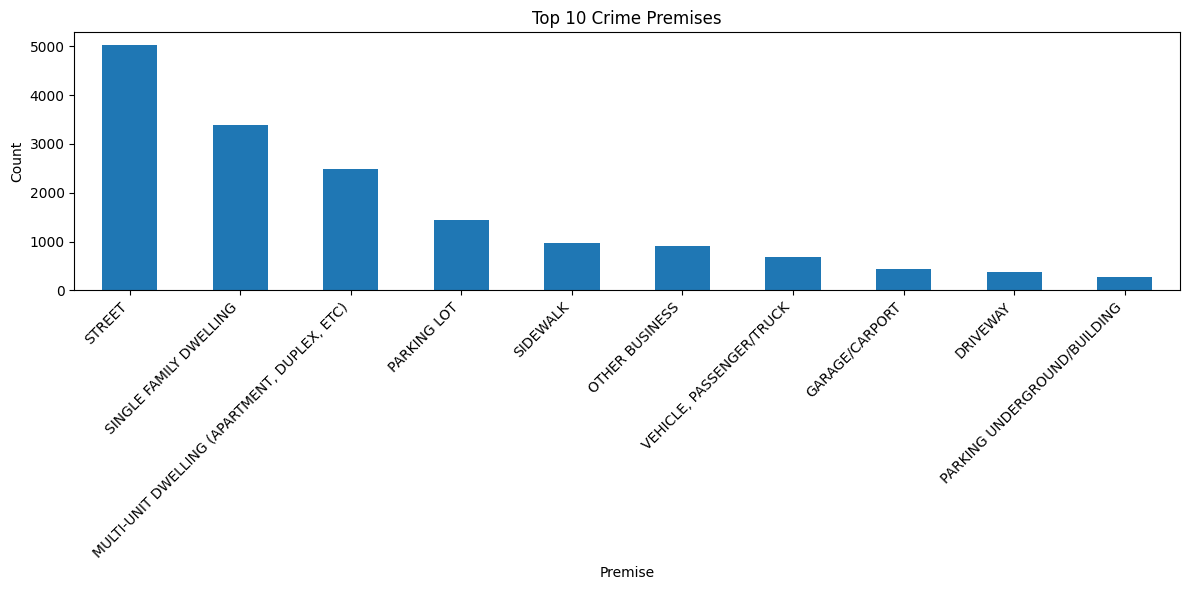

In [18]:
plt.figure(figsize=(12, 6))
premise_counts = data_train['Premise_Description'].value_counts().head(10)
print("\nTop 10 Crime Premises:")
print(premise_counts)
premise_counts.plot(kind='bar')
plt.title('Top 10 Crime Premises')
plt.xlabel('Premise')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_18/1417597851.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  crime_over_time = data_train.groupby('Date_Occurred')['Crime_Category'].count().resample('M').sum()



Crime Frequency Over Time (Monthly):
Date_Occurred
2020-01-31    1835
2020-02-29    1663
2020-03-31    1630
2020-04-30    1569
2020-05-31    1755
2020-06-30    1697
2020-07-31    1670
2020-08-31    1662
2020-09-30    1643
2020-10-31    1685
2020-11-30    1553
2020-12-31    1638
Freq: ME, Name: Crime_Category, dtype: int64


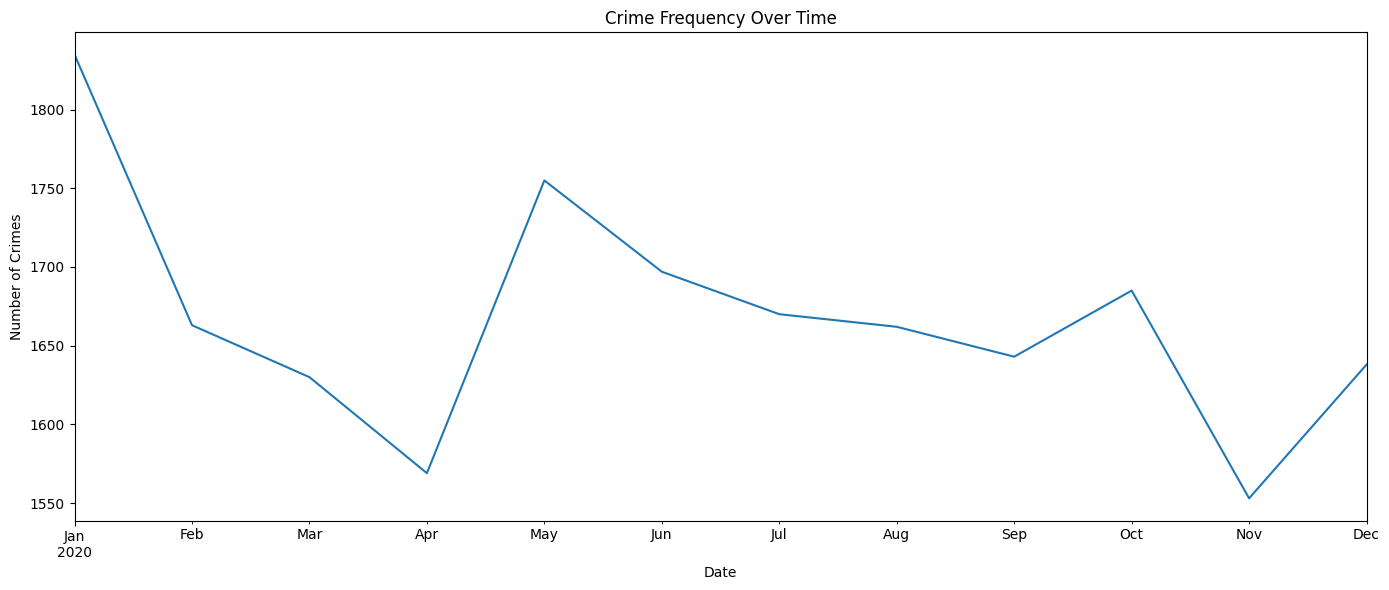

In [19]:
crime_over_time = data_train.groupby('Date_Occurred')['Crime_Category'].count().resample('M').sum()
print("\nCrime Frequency Over Time (Monthly):")
print(crime_over_time)
plt.figure(figsize=(14, 6))
crime_over_time.plot()
plt.title('Crime Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


Victim Age Distribution Statistics:
count    20000.000000
mean        30.135000
std         21.863645
min         -2.000000
25%         12.000000
50%         31.000000
75%         46.000000
max         99.000000
Name: Victim_Age, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


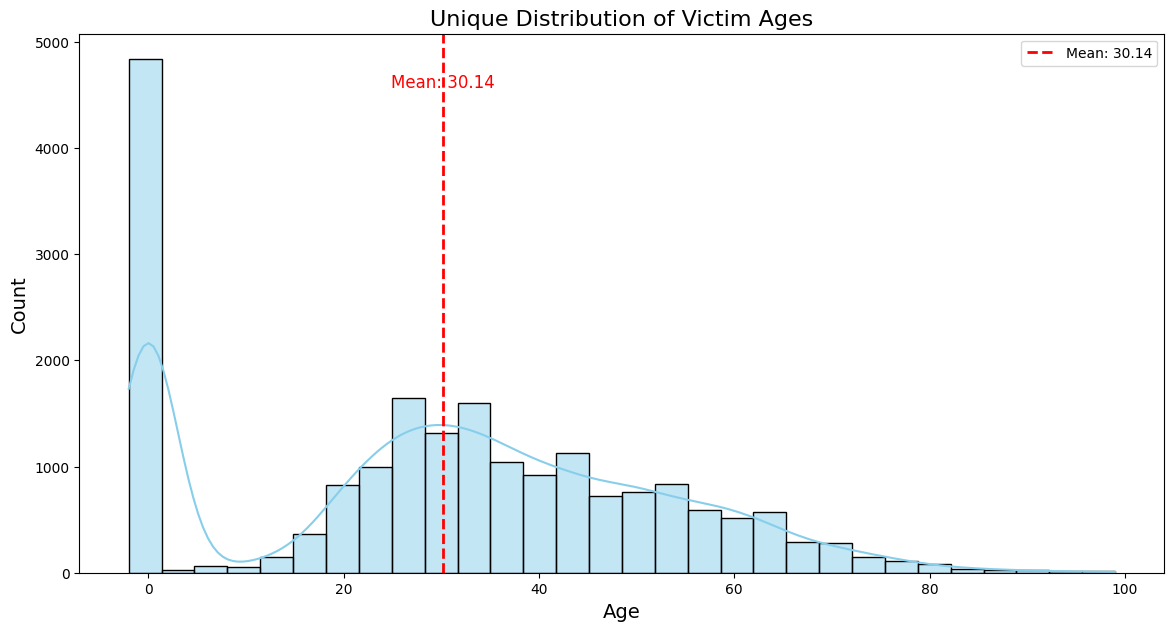

In [20]:
# Unique Victim Age Distribution
plt.figure(figsize=(14, 7))

mean_age = data_train['Victim_Age'].mean()


print("\nVictim Age Distribution Statistics:")
print(data_train['Victim_Age'].describe())

sns.histplot(data=data_train, x='Victim_Age', bins=30, kde=True, color='skyblue')

plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.2f}')

plt.text(mean_age, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_age:.2f}', color='red', fontsize=12, ha='center')

# Title and labels
plt.title('Unique Distribution of Victim Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Legend
plt.legend()

# Show plot
plt.show()


<Figure size 1200x600 with 0 Axes>

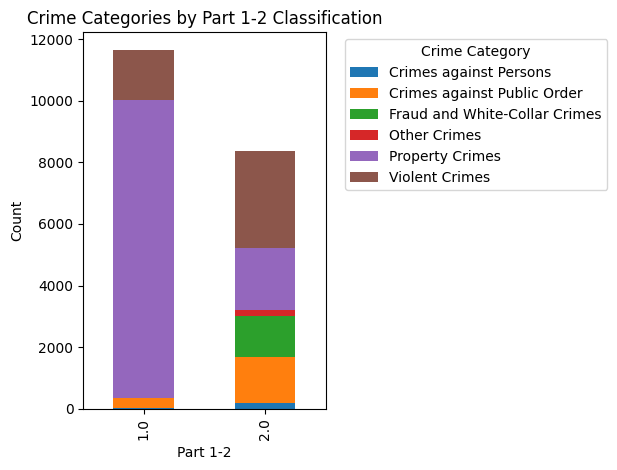

In [21]:
plt.figure(figsize=(12, 6))
crime_part_counts = data_train.groupby(['Part 1-2', 'Crime_Category']).size().unstack()
crime_part_counts.plot(kind='bar', stacked=True)
plt.title('Crime Categories by Part 1-2 Classification')
plt.xlabel('Part 1-2')
plt.ylabel('Count')
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



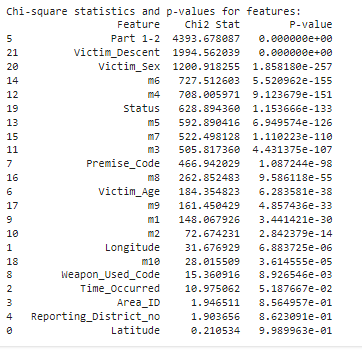

In [22]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

def add_time_features(df):
    df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], errors='coerce')
    
    df['Year'] = df['Date_Occurred'].dt.year
    df['Month'] = df['Date_Occurred'].dt.month
    df['Day'] = df['Date_Occurred'].dt.day
    df['DayOfWeek'] = df['Date_Occurred'].dt.dayofweek
    df['Quarter'] = df['Date_Occurred'].dt.quarter
    df['WeekOfYear'] = df['Date_Occurred'].dt.isocalendar().week
    df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
    
    def parse_time(time_str):
        try:
            return pd.to_datetime(time_str, format='%H:%M').hour
        except ValueError:
            try:
                return pd.to_datetime(time_str, format='%H%M').hour
            except ValueError:
                return np.nan

    df['Hour'] = df['Time_Occurred'].apply(parse_time)
    
    return df

# Load and preprocess training data
data_train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
data_train = add_time_features(data_train)

split_modus = data_train["Modus_Operandi"].str.split(expand=True)
split_modus = split_modus.rename(columns={i: f"m{i+1}" for i in range(10)})
split_modus = split_modus.fillna(0)
data_train = pd.concat([data_train, split_modus], axis=1)

# Separate time-based features
time_features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'WeekOfYear', 'IsWeekend', 'Hour']

other_features = [
    "Status", "Victim_Sex", 'Part 1-2', 'Victim_Age', 'Premise_Code',
    'Weapon_Used_Code', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10',
    'Area_ID', 'Reporting_District_no', 'Victim_Descent'
]

X = data_train[other_features + time_features]
y = data_train['Crime_Category']

le = LabelEncoder()
y = le.fit_transform(y)

rfe = RFE(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'), n_features_to_select=2)
rfe = rfe.fit(X[time_features], y)

# Get selected time features
selected_time_features = [feature for feature, selected in zip(time_features, rfe.support_) if selected]
print("Selected time features:", selected_time_features)

# Update features_to_keep
features_to_keep = other_features + selected_time_features

X = data_train[features_to_keep]

categorical_features = ['Victim_Age', 'Victim_Sex', 'Status', 'Victim_Descent']
numerical_features = [col for col in X.columns if col not in categorical_features]

numerical_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Define pipelines without SMOTE
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

xgb_param_dist = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [3, 4, 5, 6, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'classifier__gamma': [0, 0.1, 0.2, 0.3],
    'classifier__min_child_weight': [1, 3, 5, 7],
    'classifier__reg_alpha': [0, 0.1, 0.5, 1],
    'classifier__reg_lambda': [0, 0.1, 0.5, 1]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fit and evaluate models
def fit_and_evaluate_model(pipeline, name, X, y):
    print(f"\nFitting {name} model...")
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    print(f"{name} scores:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    return pipeline, accuracy, precision, recall, f1

print("\nPerforming RandomizedSearchCV for XGBoost...")
xgb_random_search = RandomizedSearchCV(
    xgb_pipeline, param_distributions=xgb_param_dist, n_iter=50, cv=cv,
    scoring='accuracy', n_jobs=-1, random_state=42, verbose=1
)
xgb_random_search.fit(X, y)
print("Best parameters for XGBoost:", xgb_random_search.best_params_)
print("Best cross-validation score for XGBoost:", xgb_random_search.best_score_)
best_xgb = xgb_random_search.best_estimator_

# Fit and evaluate all models
best_xgb, xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = fit_and_evaluate_model(best_xgb, "XGBoost", X, y)
best_svm, svm_accuracy, svm_precision, svm_recall, svm_f1 = fit_and_evaluate_model(svm_pipeline, "SVM", X, y)
best_dt, dt_accuracy, dt_precision, dt_recall, dt_f1 = fit_and_evaluate_model(dt_pipeline, "Decision Tree", X, y)
best_knn, knn_accuracy, knn_precision, knn_recall, knn_f1 = fit_and_evaluate_model(knn_pipeline, "KNN", X, y)
best_rf, rf_accuracy, rf_precision, rf_recall, rf_f1 = fit_and_evaluate_model(rf_pipeline, "Random Forest", X, y)

# Load and preprocess test data
data_test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
data_test = add_time_features(data_test)

split_modus = data_test["Modus_Operandi"].str.split(expand=True)
split_modus = split_modus.rename(columns={i: f"m{i+1}" for i in range(10)})
split_modus = split_modus.fillna(0)
data_test = pd.concat([data_test, split_modus], axis=1)

data_test = data_test[features_to_keep]

# Make predictions
xgb_predictions = le.inverse_transform(best_xgb.predict(data_test))
svm_predictions = le.inverse_transform(best_svm.predict(data_test))
dt_predictions = le.inverse_transform(best_dt.predict(data_test))
knn_predictions = le.inverse_transform(best_knn.predict(data_test))
rf_predictions = le.inverse_transform(best_rf.predict(data_test))

print("\nPredictions made for all models.")


/tmp/ipykernel_18/3867594612.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], errors='coerce')


Selected time features: ['Day', 'Hour']

Performing RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost: {'classifier__subsample': 0.9, 'classifier__reg_lambda': 0, 'classifier__reg_alpha': 0, 'classifier__n_estimators': 300, 'classifier__min_child_weight': 3, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.2, 'classifier__gamma': 0.2, 'classifier__colsample_bytree': 0.7}
Best cross-validation score for XGBoost: 0.9410999999999999

Fitting XGBoost model...
XGBoost scores:
Accuracy: 0.9992
Precision: 0.9993
Recall: 0.9992
F1-score: 0.9992

Fitting SVM model...


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM scores:
Accuracy: 0.7027
Precision: 0.6881
Recall: 0.7027
F1-score: 0.6464

Fitting Decision Tree model...
Decision Tree scores:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Fitting KNN model...
KNN scores:
Accuracy: 0.7848
Precision: 0.7760
Recall: 0.7848
F1-score: 0.7754

Fitting Random Forest model...
Random Forest scores:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


/tmp/ipykernel_18/3867594612.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], errors='coerce')



Predictions made for all models.


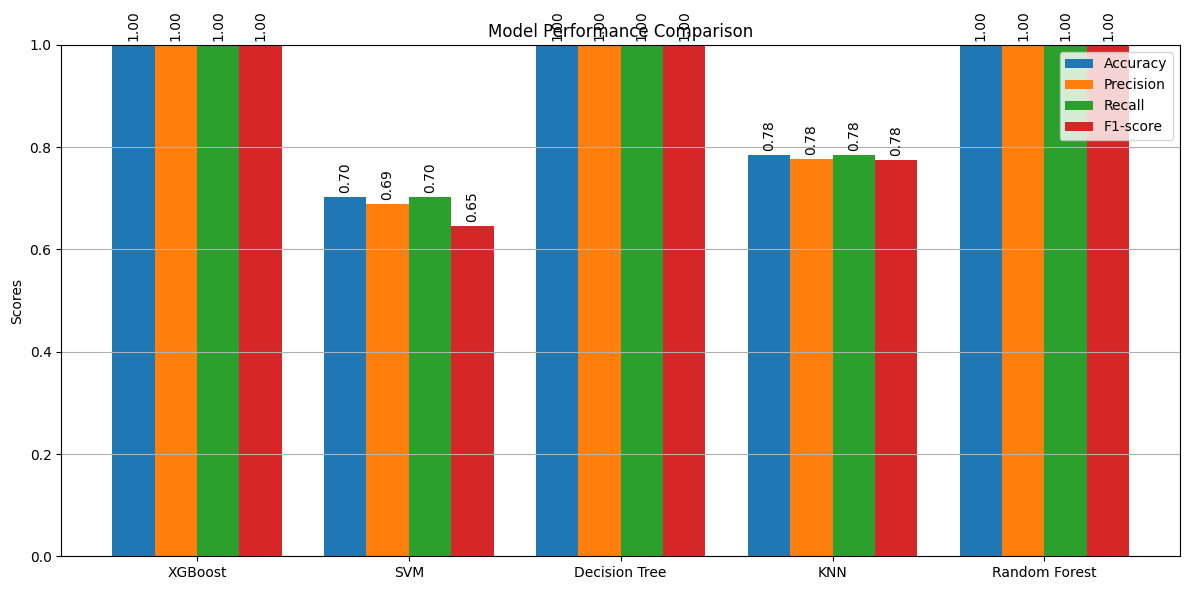

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have these variables from the previous code
models = ['XGBoost', 'SVM', 'Decision Tree', 'KNN', 'Random Forest']
accuracies = [xgb_accuracy, svm_accuracy, dt_accuracy, knn_accuracy, rf_accuracy]
precisions = [xgb_precision, svm_precision, dt_precision, knn_precision, rf_precision]
recalls = [xgb_recall, svm_recall, dt_recall, knn_recall, rf_recall]
f1_scores = [xgb_f1, svm_f1, dt_f1, knn_f1, rf_f1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='#1f77b4')
rects2 = ax.bar(x - 0.5*width, precisions, width, label='Precision', color='#ff7f0e')
rects3 = ax.bar(x + 0.5*width, recalls, width, label='Recall', color='#2ca02c')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-score', color='#d62728')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.set_ylim(0, 1)
ax.yaxis.grid(True)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()

In [24]:
print(data_train['Date_Occurred'].head())
print(data_train['Time_Occurred'].head())

0   2020-03-06
1   2020-02-27
2   2020-08-21
3   2020-11-06
4   2020-02-25
Name: Date_Occurred, dtype: datetime64[ns]
0    1800.0
1    1345.0
2     605.0
3    1800.0
4    1130.0
Name: Time_Occurred, dtype: float64


In [25]:
submission = pd.DataFrame({
    'ID': range(1, len(xgb_predictions) + 1),
    'Crime_Category': xgb_predictions
})
submission.to_csv('submissionnn2.csv', index=False)